In [ ]:
# Set working directory
from google.colab import drive, files
drive.mount('/content/gdrive')
%cd './gdrive/My Drive/Multivariate Discounting/Scripts and Notebooks/'

Mounted at /content/gdrive
/content/gdrive/My Drive/Multivariate Discounting/Scripts and Notebooks


In [ ]:
# System
import os
import sys
import warnings
warnings.filterwarnings("ignore")
from IPython.display import clear_output

# Data Manipulation
!pip install researchpy
import researchpy as rp
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# Analytics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

# Script preference
pd.set_option("display.max_columns", None)

# Functions

In [ ]:
def hist_plot(df, col, hue, xlabel, ylabel, stat, save_name):
  '''
  Simple function to generate histplot
  '''
  fig, ax = plt.subplots(figsize=(15, 12))
  sns.histplot(data=df, x=col, hue=hue, stat=stat, bins=100)
  plt.yticks(fontsize=20)
  plt.ylabel(ylabel, fontsize=30, labelpad=20)
  plt.xticks(fontsize=20)
  plt.xlabel(xlabel, fontsize=30, labelpad=20)
  plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
  plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
  ax.get_legend().get_frame().set_edgecolor('w')
  plt.savefig(f'../Figures/{save_name}.png', bbox_inches='tight')
  plt.show()


# Read in data

In [ ]:
# Read each model fit dataset in 
abr = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_ABR.csv').drop(['Unnamed: 0'], axis=1)
gbr = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_GBR.csv').drop(['Unnamed: 0'], axis=1)
lr = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_LR.csv').drop(['Unnamed: 0'], axis=1)
rf = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_RF.csv').drop(['Unnamed: 0'], axis=1)
br = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_BR.csv').drop(['Unnamed: 0'], axis=1)
las = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_LaR.csv').drop(['Unnamed: 0'], axis=1)
me = pd.read_csv('/content/gdrive/MyDrive/Multivariate Discounting/Data/02_initial_models_output/boostrapped_ml_regressors_ME.csv').drop(['Unnamed: 0'], axis=1)

In [ ]:
# Merge into single df
df = abr.append(gbr, ignore_index=True)
df = df.append(lr, ignore_index=True)
df = df.append(rf, ignore_index=True)
df = df.append(br, ignore_index=True)
df = df.append(las, ignore_index=True)
df = df.append(me[me['vac']>-2], ignore_index=True)
df = df.reset_index(drop=True)
df = df.replace('ABR', 'Adaptive Boosting')
df = df.replace('GBR', 'Gradient Boosting')
df = df.replace('LR', 'Linear Regression')
df = df.replace('RF', 'Random Forest')
df = df.replace('BR', 'Bayesian Ridge')
df = df.replace('LaR', 'LASSO Regression')
df = df.replace('ME', 'Mixed Effects')

# Visualizations

### Overarching Models

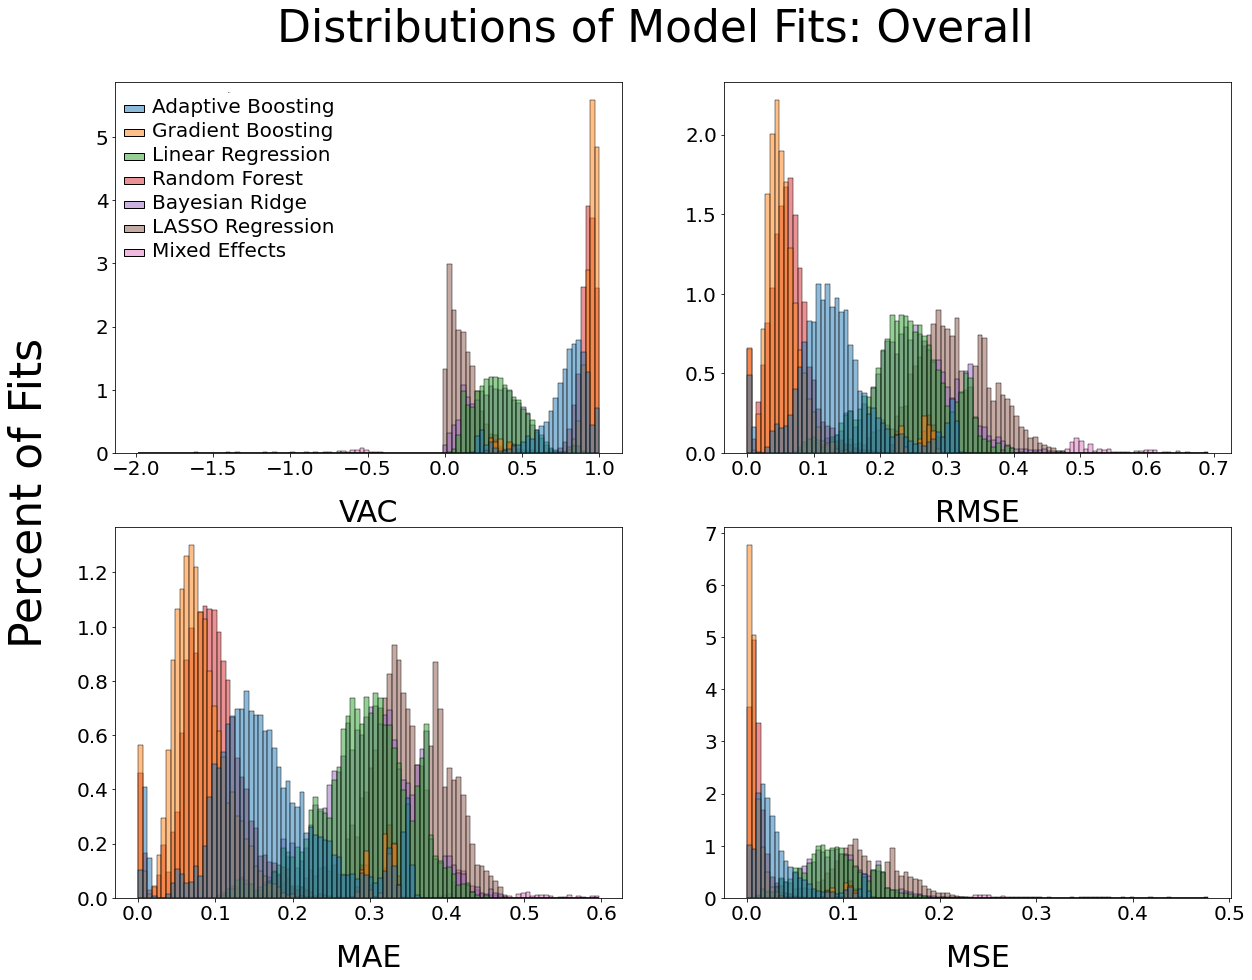

In [ ]:
# Hist plot of the overarching models
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Iterate through models for plotting
row = 0
col = 0
for loss_metric in ['vac', 'rmse', 'mae', 'mse']:
    sns.histplot(ax=ax[row, col], data=df, x=df[loss_metric], hue='model', stat='percent', bins=100, palette='tab10')
    ax[row, col].set_xlabel(loss_metric.upper(), fontsize=30, labelpad=20)
    ax[row, col].set_ylabel('', fontsize=30, labelpad=20)
    # Adjust legends
    if (row==0) and (col==0):
      plt.setp(ax[row, col].get_legend().get_texts(), fontsize='20') # for legend text
      plt.setp(ax[row, col].get_legend().get_title(), fontsize='0') # for legend title
      ax[row, col].get_legend().get_frame().set_edgecolor('w')
    else:
      ax[row, col].get_legend().remove()
      ax[row, col].set_xlabel(loss_metric.upper(), fontsize=30, labelpad=20)
    if (row==0) and (col==0):
        col=1
    elif (row==0) and (col==1):
        row=1
        col=0
    else: 
      row=1
      col=1
      
# Adjust ticks
ax[0, 0].tick_params(axis='both', labelsize=20)
ax[0, 1].tick_params(axis='both', labelsize=20)
ax[1, 0].tick_params(axis='both', labelsize=20)
ax[1, 1].tick_params(axis='both', labelsize=20)

# Add combined ylabel
fig.text(0.05, 0.5, 'Percent of Fits', fontsize=44, va='center', rotation='vertical')

# Overarching title
plt.suptitle('Distributions of Model Fits: Overall', fontsize=44, y=0.95, ha='center')

plt.savefig(f'../Figures/grid_plot_histplots_model_by_loss.png', bbox_inches='tight')
plt.show()

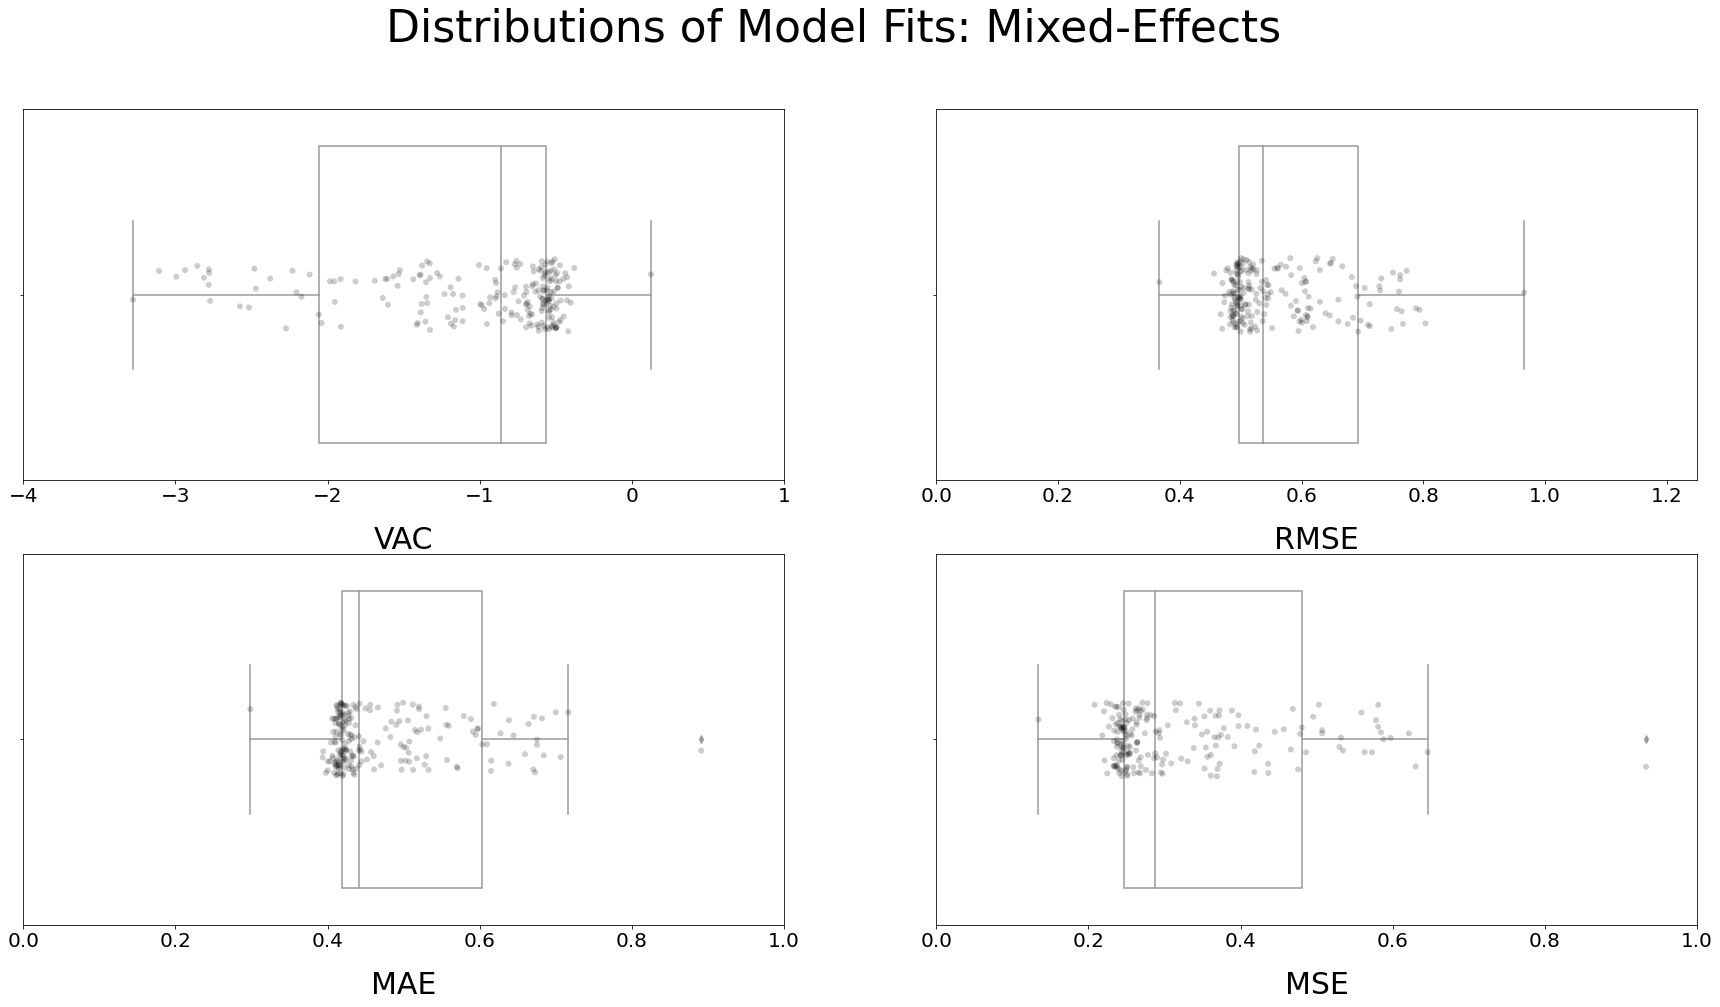

In [ ]:
# Mixed effects models look like garbage. Let's look a bit closer
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30, 15))
row = 0
col = 0
for loss_metric in ['vac', 'rmse', 'mae', 'mse']:
    sns.boxplot(ax=ax[row, col], data=me, x=me[loss_metric], color='w')
    sns.stripplot(ax=ax[row, col], data=me, x=me[loss_metric], color='k', size=6, alpha=0.2)
    ax[row, col].set_xlabel(loss_metric.upper(), fontsize=30, labelpad=20)
    ax[row, col].set_ylabel('', fontsize=30, labelpad=20)
    if (row==0) and (col==0):
        col=1
    elif (row==0) and (col==1):
        row=1
        col=0
    else: 
      row=1
      col=1
      
# Adjust ticks
ax[0, 0].tick_params(axis='both', labelsize=20)
ax[0, 0].set_xlim(-4, 1)
ax[0, 1].tick_params(axis='both', labelsize=20)
ax[0, 1].set_xlim(0, 1.25)
ax[1, 0].tick_params(axis='both', labelsize=20)
ax[1, 0].set_xlim(0, 1)
ax[1, 1].tick_params(axis='both', labelsize=20)
ax[1, 1].set_xlim(0, 1)

# Add combined ylabel
fig.text(0.075, 0.5, '', fontsize=44, va='center', rotation='vertical')

# Overarching title
plt.suptitle('Distributions of Model Fits: Mixed-Effects', fontsize=44, y=0.975, ha='center')

plt.savefig(f'../Figures/grid_plot_mixed_effects_by_loss.png', bbox_inches='tight')
plt.show()

The main story from the plot above is that - regardless of fit metric - the linear regression and mixed-effects models performed significantly less well than the other approaches. All VACs for the mixed-effects model were less than 0 (i.e. garbage), so we'll drop that one straight away. 

But it's possible that there were differences based on fitting to group data versus individual, and differences between cocaine versus control groups. So let's test that. 

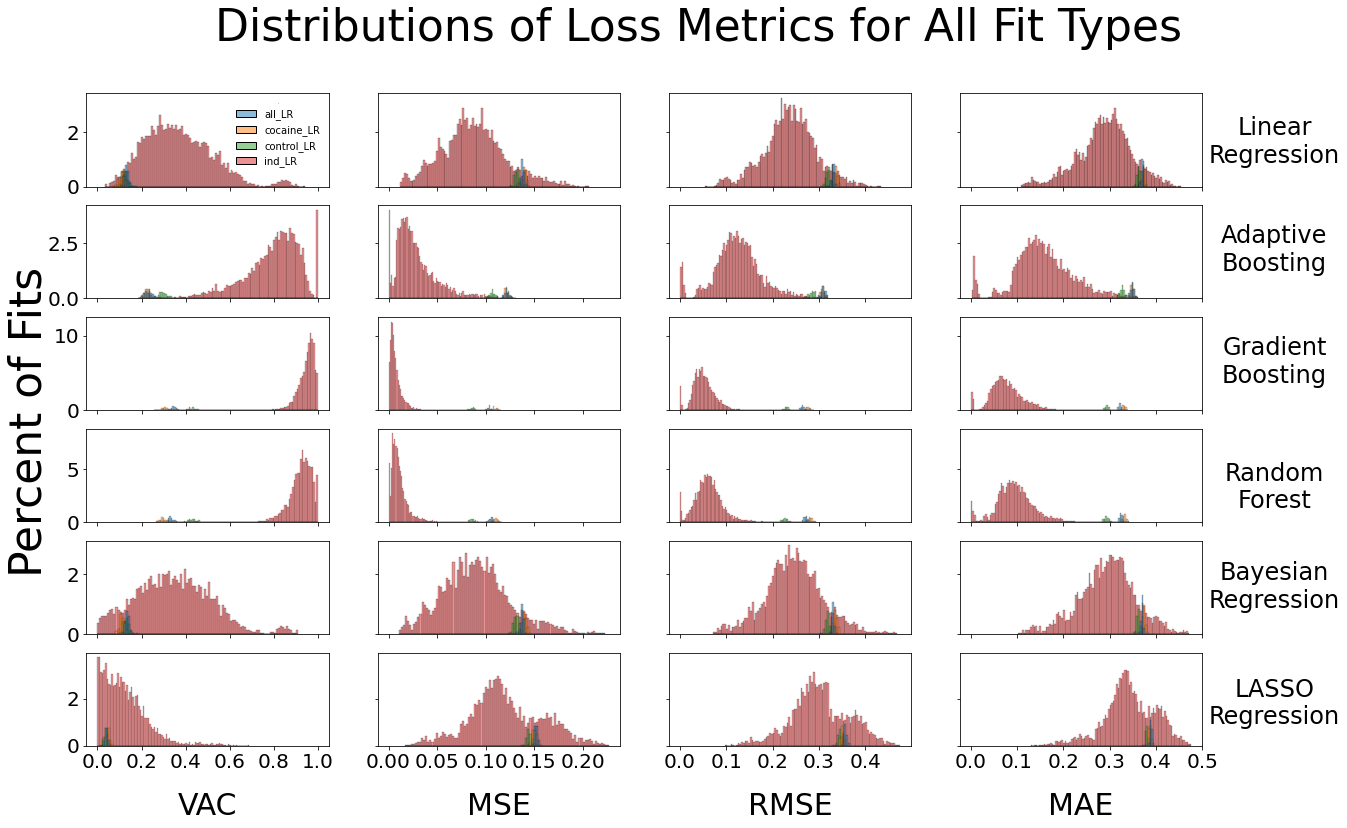

In [ ]:
# Isolate the data we're interested in
plot_df = df.copy()

# Plot it
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20, 12), sharey='row', sharex='col')

# Iterate through models and loss metrics for plotting
row = 0
col = 0
for model in ['Linear Regression', 'Adaptive Boosting', 'Gradient Boosting', 'Random Forest', 
              'Bayesian Ridge', 'LASSO Regression']:
  for loss_metric in ['vac', 'mse', 'rmse', 'mae']:
      sns.histplot(ax=ax[row, col], data=plot_df[plot_df['model']==model], x=plot_df[loss_metric], hue='fit', stat='percent', bins=100)
      ax[row, col].set_xlabel(loss_metric.upper(), fontsize=30, labelpad=20)
      ax[row, col].set_ylabel('', fontsize=30, labelpad=20)
      if col<3:
        col+=1
      else:
        col=0
  if row<5:
    row+=1
  else:
    continue

# Adjust legends
for row in list(range(6)):
  for col in list(range(4)):
    if (row==0) and (col==0):
      plt.setp(ax[row, col].get_legend().get_texts(), fontsize='10') # for legend text
      plt.setp(ax[row, col].get_legend().get_title(), fontsize='0') # for legend title
      ax[row, col].get_legend().get_frame().set_edgecolor('w')
    else:
      ax[row, col].get_legend().remove()

# Adjust ticks
for col in list(range(4)):
  ax[5, col].tick_params(axis='both', labelsize=20)
for row in list(range(6)):
  ax[row, 0].tick_params(axis='y', labelsize=20)

# Add model labels
fig.text(0.95, 0.80, 'Linear\nRegression', fontsize=24, ha='center')
fig.text(0.95, 0.675, 'Adaptive\nBoosting', fontsize=24, ha='center')
fig.text(0.95, 0.545, 'Gradient\nBoosting', fontsize=24, ha='center')
fig.text(0.95, 0.40, 'Random\nForest', fontsize=24, ha='center')
fig.text(0.95, 0.285, 'Bayesian\nRegression', fontsize=24, ha='center')
fig.text(0.95, 0.15, 'LASSO\nRegression', fontsize=24, ha='center')

# Add combined ylabel
fig.text(0.07, 0.5, 'Percent of Fits', fontsize=44, va='center', rotation='vertical')

# Overarching title
plt.suptitle('Distributions of Loss Metrics for All Fit Types', fontsize=44, x=0.55, ha='center')

plt.savefig(f'../Figures/grid_plot_histplots_all_fits_by_loss_metric.png', bbox_inches='tight')
plt.show()

Two main findings from the above:
1. Individual fits are describing our data better than group fits. 
2. The models trends from the previous graph are still observed here (i.e., linear regression not great, GB and RF seem to be performing best). 

What's not easily viewed here is whether there's a difference between cocaine and control groups with the fits at the individual level. Let's look at that. 

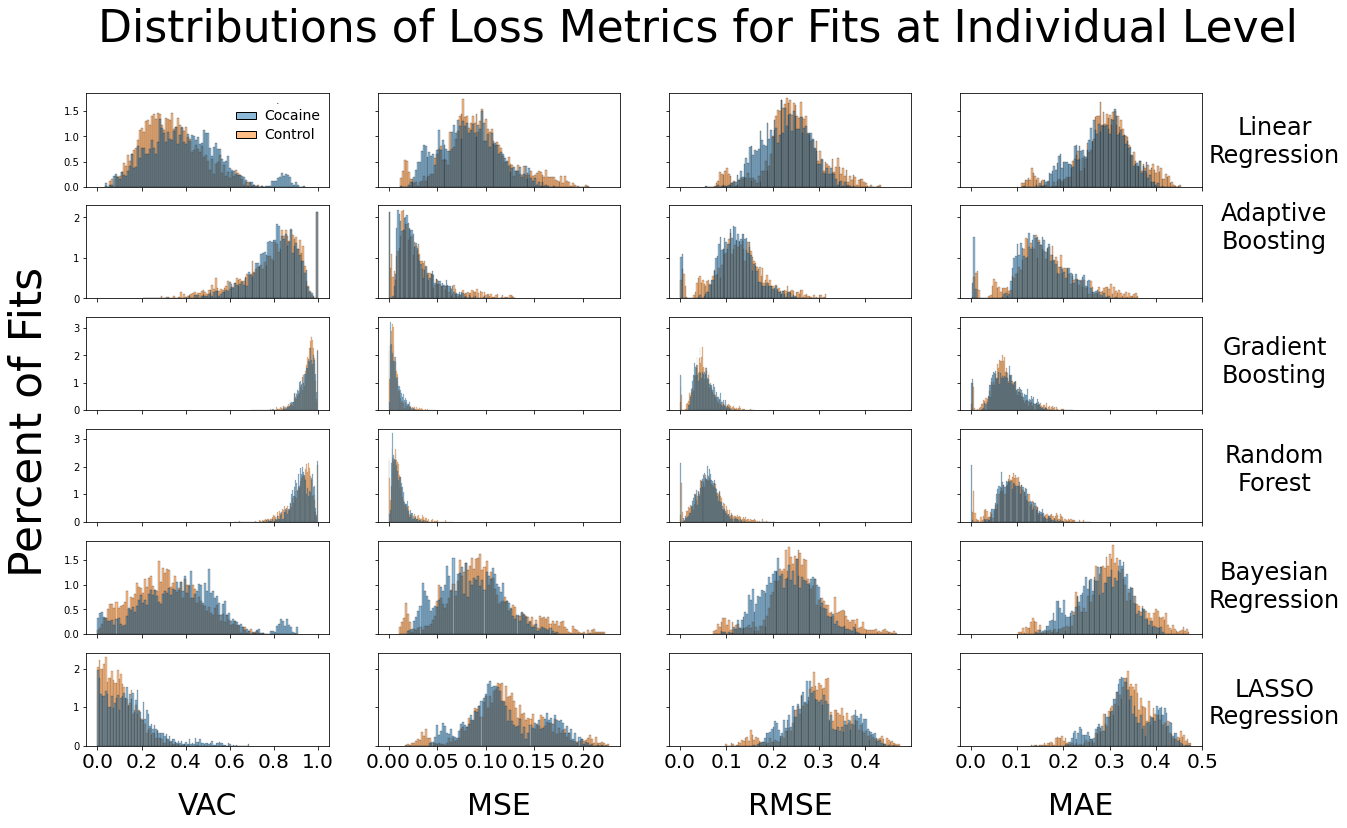

In [ ]:
# Isolate the data we're interested in
plot_df = df[df['fit'].isin(['ind_ABR', 'ind_GBR', 'ind_LR', 'ind_RF', 
                             'ind_BR', 'ind_LaR', 'ind_PR'])]
plot_df = plot_df.replace('cocaine', 'Cocaine')
plot_df = plot_df.replace('control', 'Control')

# Plot it
fig, ax = plt.subplots(nrows=6, ncols=4, figsize=(20, 12), sharey='row', sharex='col')

# Iterate through models and loss metrics for plotting
row = 0
col = 0
for model in ['Linear Regression', 'Adaptive Boosting', 'Gradient Boosting', 'Random Forest', 
              'Bayesian Ridge', 'LASSO Regression']:
  for loss_metric in ['vac', 'mse', 'rmse', 'mae']:
      sns.histplot(ax=ax[row, col], data=plot_df[plot_df['model']==model], x=plot_df[loss_metric], hue='group', stat='percent', bins=100)
      ax[row, col].set_xlabel(loss_metric.upper(), fontsize=30, labelpad=20)
      ax[row, col].set_ylabel('', fontsize=30, labelpad=20)
      if col<3:
        col+=1
      else:
        col=0
  if row<5:
    row+=1
  else:
    continue

# Adjust legends
for row in list(range(6)):
  for col in list(range(4)):
    if (row==0) and (col==0):
      plt.setp(ax[row, col].get_legend().get_texts(), fontsize='14') # for legend text
      plt.setp(ax[row, col].get_legend().get_title(), fontsize='0') # for legend title
      ax[row, col].get_legend().get_frame().set_edgecolor('w')
    else:
      ax[row, col].get_legend().remove()

# Adjust ticks
for col in list(range(4)):
  ax[5, col].tick_params(axis='x', labelsize=20)

# Add model labels
fig.text(0.95, 0.80, 'Linear\nRegression', fontsize=24, ha='center')
fig.text(0.95, 0.70, 'Adaptive\nBoosting', fontsize=24, ha='center')
fig.text(0.95, 0.545, 'Gradient\nBoosting', fontsize=24, ha='center')
fig.text(0.95, 0.42, 'Random\nForest', fontsize=24, ha='center')
fig.text(0.95, 0.285, 'Bayesian\nRegression', fontsize=24, ha='center')
fig.text(0.95, 0.15, 'LASSO\nRegression', fontsize=24, ha='center')

# Add combined ylabel
fig.text(0.07, 0.5, 'Percent of Fits', fontsize=44, va='center', rotation='vertical')

# Overarching title
plt.suptitle('Distributions of Loss Metrics for Fits at Individual Level', fontsize=44, x=0.55, ha='center')

plt.savefig(f'../Figures/grid_plot_histplots_indFits_by_loss_metric.png', bbox_inches='tight')
plt.show()

There does not appear to be a difference between how well the models are describing these two groups. That's good as it means we can use any of these approaches without having to worry about correcting for it. 

Main findings from the first pass at modeling visualizations:

*   We should move forward with further comparisons of the GB and RF Regressors. 
*   Modeling should be done at the individual level. 

